<a href="https://colab.research.google.com/github/ashishpoudel995/Word-Segmentation-for-Nepali-Language/blob/main/Word_Segmentation_for_Nepali_Language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Word Segmentation for Nepali Language**

## **1. Storing the most common non verb Words**
##### *3000 common words taken from website(3000mostcommonwords.com) and just storing non verb words*
##### *Verbal Inflections implemented in later stages. So, no need to store Verbs as of now*

In [ ]:
import pandas as pd

In [ ]:
csv=pd.read_csv("3000-common-words.csv")

In [ ]:
print(csv.head())

   Sr    Words                P.O.S Level Nepali Word
0   1    a, an  indefinite, article    A1      एक, एक
1   2  abandon                 Verb    B2     त्याग्न
2   3  ability                 Noun    A2      क्षमता
3   4     able            Adjective    A2       सक्षम
4   5    about         prep. Adverb    A1      बारेमा


In [ ]:
words_collection=[]
for index, row in csv.iterrows():
  if row["P.O.S"]!="Verb":
    if row["Nepali Word"] not in words_collection:
      words_collection.append(row["Nepali Word"])

In [ ]:
print(len(words_collection))

2204


##**2. FSA for Verb Recognition**
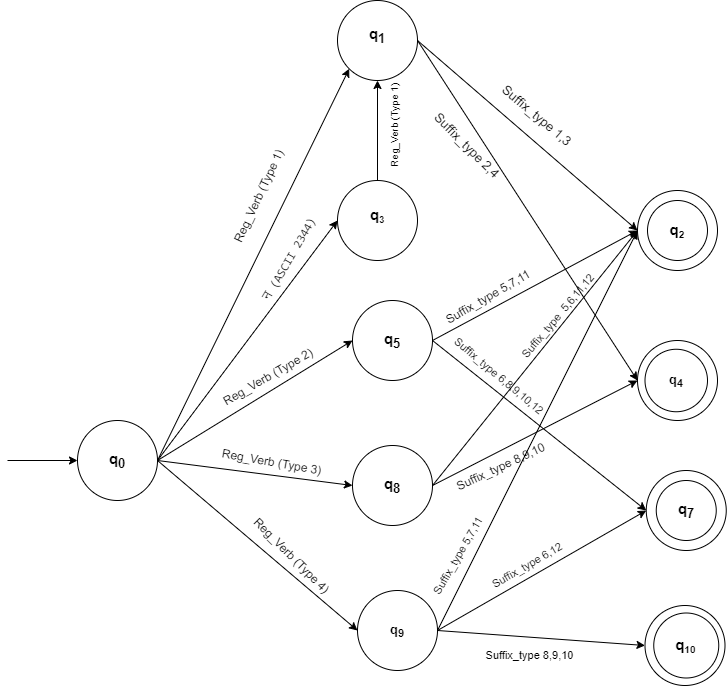

In [2]:
#Verb Stems

#Regular Verbs Type 1
verb_stems_type1=["घुम्","सुत्","पढ्","पर्","गर्","हेर्","सुन्","भन्","बोल्","चल्","मुत्","लेख्","बुझ्","उठ्","खेल्","सोच्","खोज्","हास्","हाक्","भेट्","बेच्","किन्","देख्","थुक्","चोर्","जीत्","खोल्","पोल्","काट्","सक्","सिक्","रोक्","थाप्","पुग्","पिट्","बग्","चल्","मान्","माग्","नाच्","बाच्","फेर्","मार्","खिच्","थिच्","फुल्","बाल्","निभ्","कुद्","तात्","हार्","राख्","मिल्","खस्"]

#Regular Verbs Type 2
verb_stems_type2=["खान्","लिन्","दिन्","फर्किन्"]

#Regular Verbs Type 3
verb_stems_type3=["लगाउ","पकाउ","गुमाउ","घुमाउ","बनाउ","आउ","चलाउ","सताउ","भगाउ","नचाउ","गाउ","पाउ"]

#Regular Verbs Type 4
verb_stems_type4=["रुन्"]

In [3]:
#Suffixes for Regular Verb Type 1
suffix_type1=["छु","छौ","यौ","छस्","लास्","छेस्","लिस्","छेउ","छ","यो","ला","छे","ली","छन्","लान्","छिन्","िन्","लिन्","नुहुन्छ","नुभयो","नुहोला","दिन","िन","दैनौ","िनौ","दैनस्","दैनेस्","दिनौ","दैन","दैने","दैनन्","दैनिन्","नुहुदैन","नुभएन","थे","दिनथे","दैनथे","थेउ","दैनथेउ","थिस्","दैनथिस्","थ्यो","दैनथ्यो","थी","दैनथी","थिन्","दैनथिन्","नुहुन्थ्यो","नुहुदैनथ्यो","नुहुन्नथ्यो"]
suffix_type2=["े","ाैला","िस्","ाैली","ी","िनस्","िनेस्","ेनौ","िनौ","ेन","िन","ेनन्","िनन्"]
suffix_type3=["लास्","लिस्","ला","ली","लान्","लिन्","नुहोला"]
suffix_type4=["ुला","ाैला","ाैली"]

#Suffixes for Regular Verbs Type 2,3,4

##Suffixes for non-past tense (affirmative)
suffix_type5=["छु","छ","छस्","छेस्","छौ","छ्याै","छे","छन्"]
##Suffixes for non-past tense negative 1
suffix_type6=["दिनँ","दैनाैँ","दैनस्","दिनस्","दैनौ","दिनाै","दैन","दिन","दैनन्","दिनन्"]
##Suffixes for non-past tense negative 2
suffix_type7=["नँ","नाैँ","नस्","नौ","न","नन्"]
##Suffixes for past tense (affirmative)
suffix_type8=["एँ","याैँ","इस्","यौ","यो","ई","ए","इन्"]
##Suffixes for past tense (negative)
suffix_type9=["इनँ","एनौ","इनस्","एनौ","इनौ","एन","इन","एनन्","इनन्"]
##Suffixes for perfect aspect
suffix_type10=["एको","एका","एकी","एकै"]
##Suffixes for past habitual aspect (Affirmative)
suffix_type11=["थेँ","थ्याैँ","थिस्","थ्याै","थ्याे","थि","थे","थिन्"]
##Suffixes for habitual aspect (negative)
suffix_type12=["दैनथेँ","दैनथ्याैँ","दैनथिस्","दैनथ्याै","दिनथ्याै","दैनथ्याे","दिनथिस्","दिनथे","दैनथे"]

In [38]:
def check_if_valid_verbConjugation(word):
  for i in range(len(word)):

    #tracking current word
    curr=word[0:i+1]
    #tracking remaning word
    rem=word[i+1:]

    #Check if the word is a valid regular verb type 1 conjugation
    if (curr in verb_stems_type1 and rem in suffix_type1):
      return True
    #check if the curr word+halanta is a valid regular verb type 1 conjugation (This means conjugation is formed by dropping last character halanta) 
    elif ((curr+chr(2381)) in verb_stems_type1 and rem in suffix_type2):
      return True
    #check if the curr word is a negative word. i.e. first character of the word is (न)<-prefix
    elif ord(word[0])==2344:
      #if the first character is न, then re extract the current word and remaining word
      curr=word[1:i+1]
      rem=word[i+1:]
      if (curr in verb_stems and rem in suffix_type3):
        return True
      #check if the curr word+halanta is a valid regular verb type 1 conjugation (This means conjugation is formed by dropping last character halanta)
      elif ((curr+chr(2381)) in verb_stems and rem in suffix_type4):
        return True
    
    #Check if the word is a valid regular verb type 2 conjugation
    if curr in verb_stems_type2:
      if rem in suffix_type5 or rem in suffix_type7 or rem in suffix_type11:
        return True
    #check if the verb conjugation is formed by dropping last two characters i.e. dropping "न्"
    elif curr+"न्" in verb_stems_type2:
      if rem in suffix_type6 or rem in suffix_type8 or rem in suffix_type9 or rem in suffix_type10 or rem in suffix_type12:
        return True
    
    #Check if the word is a valid regular verb type 3 conjugation
    if curr in verb_stems_type3:
      if rem in suffix_type5 or rem in suffix_type6 or rem in suffix_type11 or rem in suffix_type12:
        return True
    #Check if the verb conjugation is formed by dropping last character ("उ")
    elif curr+"उ" in verb_stems_type3:
      if rem in suffix_type8 or rem in suffix_type9 or rem in suffix_type10:
        return True
    
    #Check if the word is a valid regular verb type 4 conjugation
    if curr in verb_stems_type4:
      if rem in suffix_type5 or rem in suffix_type7 or rem in suffix_type11:
        return True
    #Check if the verb conjugation is formed by dropping last two characters. i.e. dropping "न्" 
    elif curr+"न्" in verb_stems_type4:
      if rem in suffix_type6 or rem in suffix_type12:
        return True
    #Check if the verb conjugation is formed by dropping last two characters i.e. "न्" and changing "ू" to "ो"
    elif word[i]=='ो':
      if (word[0:i]+"ु"+"न्") in verb_stems_type4:
        if rem in suffix_type8 or rem in suffix_type9 or rem in suffix_type10:
          return True

  #If the word is not a valid regular verb conjugation
  return False

##**3. Simpler Matching Algorithm**

In [ ]:
input_string="मएकसक्षमडिजाइनरमघुम्छु"
res=""
start=0
for i in range (len(input_string)):
    #tracking the current word
    curr_string=input_string[start:i+1]

    #check if the current word is present in either words_collection(non verb collection) or generated conjugated forms of the verbs.
    if(curr_string in words_collection or check_if_valid_verbConjugation(curr_string)):
        #if the word is considered to be a valid word, append it to result and add space(Nepali is a segmented language)
        res=res+curr_string+" "
        start=i+1

#Finally print the result of the Simpler Matching Algorithm
print("The segmented words are:")
print(res)

The segmented words are:
म एक सक्षम डिजाइन र म घुम्छ 


## **4. Maximal Matching Algorithm**

In [ ]:
res=""
start=0
while start<len(input_string):
    max_word=""
    for i in range(start, len(input_string)):
        curr_word=input_string[start:i+1]
        if curr_word in words_collection or check_if_valid_verbConjugation(curr_word):
          if len(curr_word)>len(max_word):
            max_word=curr_word
    if(len(max_word)==0):
        res+=input_string[i:i+1]+" "
        start=start+1
    else:
        start=start+len(max_word)
        res+=max_word+" "
print(res)

म एक सक्षम डिजाइनर म घुम्छु 


## **5. Bidirectional Maximal Matching Algorithm**

In [ ]:
res_left=""

#Scan from left
start=0
left_count=0
while start<len(input_string):
    max_word=""
    for i in range(start, len(input_string)):
        curr_word=input_string[start:i+1]
        if curr_word in words_collection or check_if_valid_verbConjugation(curr_word):
          if len(curr_word)>len(max_word):
            max_word=curr_word
    if(len(max_word)==0):
        left_count=left_count+1
        res_left+=input_string[i:i+1]+" "
        start=start+1
    else:
        start=start+len(max_word)
        res_left+=max_word+" "

#Scan from right
res_right=""
start=len(input_string)-1
right_count=0
while start>=0:
    max_word=""
    i=start
    while i>=0:
        curr_word=input_string[i:start+1]
        if curr_word in words_collection or check_if_valid_verbConjugation(curr_word):
          if len(curr_word)>len(max_word):
            max_word=curr_word
        i=i-1
    if (len(max_word)==0):
        res_right+=input_string[i:i+1]+" "
        start=start-1
        right_count=right_count+1
    else:
        start=start-len(max_word)
        res_right+=max_word+" "

#Print the best scan
if left_count<=right_count:
  print(res_left)
else:
  print(res_right)

म एक सक्षम डिजाइनर म घुम्छु 


## **Maximum Matching Algorithm**